# Creating necessary framework

## Create the necessary training data

In [14]:
library(tidyverse)
library(car)
library(olsrr)
library(stringr)
library(tidytext)
library(syuzhet)

In [15]:
# Make sure to change this
setwd("/home/yeachan153/Desktop/BDS/R/Big Data Analytics/Big-Data-Analytics/Text Analytics Project")

" 
Read in the CSV file
"
personality = as.tibble(read.csv("youtube-personality/YouTube-Personality-Personality_impression_scores_train.csv", 
                                 encoding = "UTF-8",
                                 sep = " "))

gender = as.tibble(read.csv("youtube-personality/YouTube-Personality-gender.csv",
                            encoding = "UTF-8",
                            sep = " "))

audiovisual = as.tibble(read.csv("youtube-personality/YouTube-Personality-audiovisual_features.csv",
                                 encoding = "UTF-8",
                                 sep = " "))

transcripts = as.tibble(read.csv("youtube-personality/transcripts.csv",
                                 encoding = "UTF-8",
                                 sep = ","))

transcripts$index = as.character(transcripts$index)

transcripts =
  transcripts %>%
  rename(vlogId = index,
         transcript = X0) %>%
  mutate(vlogId = substr(vlogId, 1, nchar(vlogId)-4))

personality$vlogId = as.character(personality$vlogId)
gender$vlogId = as.character(gender$vlogId)
audiovisual$vlogId = as.character(audiovisual$vlogId)

training_data = 
  personality %>%
  left_join(gender, on = c("vlogID" = "vlogID")) %>%
  left_join(audiovisual, on = c("vlogID" = "vlogID")) %>%
  left_join(transcripts, on = c("clogID" = "vlogID"))

#tokenization
training_data$transcript <- as.vector(training_data$transcript)
tidy_data <- training_data %>% 
  unnest_tokens(word, transcript, to_lower = TRUE) %>% 
  anti_join(get_stopwords())

#count the total number of words for each person
total_words <- tidy_data %>% 
  group_by(vlogId) %>% 
  count() %>% 
  rename(total_words = n)

#count the percentage of words related to big 5
words_E = c("bar","drinks", "restaurant", "dancing", "restaurants", "grandfather", "miami", "countless", "drinking", "shots", "girls", "glorious", "pool", "crowd", "sang", "grilled")
words_A = c("wonderful", "together", "visiting", "morning", "spring", "walked", "beautiful", "staying", "felt", "share", "gray", "joy", "afternoon", "day", "moments", "hug", "glad")
words_C = c("completed", "adventure", "adventures", "enjoying", "hawaii", "it's", "deck")
words_N = c("awful", "though", "lazy", "worse", "depressing", "irony", "terrible", "stressful", "horrible", "sort", "annoying", "ashamed", "ban")
words_O = c("folk", "humans", "of", "poet", "art", "by", "universe", "poetry", "narrative", "culture", "century", "sexual", "films", "novel", "decades", "ink", "passage", "literature", "blues")
words_nE = c("other", "cats", "computer", "minor")
words_nA = c("porn", "cost", "fuck")
words_nC = c("stupid", "boring", "desperate", "saying", "utter", "it's", "extreme")
words_nN = c("road", "southern", "visited", "ground", "oldest", "invited", "completed")
words_nO = c("giveaway")

check_words <- function(wordlist){
  tidy_data %>% 
    filter(word %in% wordlist) %>% 
    group_by(vlogId) %>% 
    count() %>% 
    left_join(total_words) %>% 
    mutate(n/total_words) %>% 
    select(-n, -total_words)
}

E_words <- check_words(words_E) %>% 
  rename(words_Extraversion = 'n/total_words')

A_words <- check_words(words_A) %>% 
  rename(words_Agreeableness = 'n/total_words')

C_words <- check_words(words_C) %>% 
  rename(words_Conscientiousness = 'n/total_words')

N_words <- check_words(words_N) %>% 
  rename(words_Neuroticism = 'n/total_words')

O_words <- check_words(words_O) %>% 
  rename(words_Openness = 'n/total_words')

nE_words <- check_words(words_nE) %>% 
  rename(words_nExtraversion = 'n/total_words')

nA_words <- check_words(words_nA) %>% 
  rename(words_nAgreeableness = 'n/total_words')

nC_words <- check_words(words_nC) %>% 
  rename(words_nConscientiousness = 'n/total_words')

nN_words <- check_words(words_nN) %>% 
  rename(words_nNeuroticism = 'n/total_words')

nO_words <- check_words(words_nO) %>% 
  rename(words_nOpenness = 'n/total_words')

#putting them bag to the training data
training_data <- training_data %>% 
  left_join(E_words) %>%
  left_join(A_words) %>%
  left_join(C_words) %>%
  left_join(N_words) %>%
  left_join(O_words) %>%
  left_join(nE_words) %>%
  left_join(nA_words) %>%
  left_join(nC_words) %>%
  left_join(nN_words) %>%
  left_join(nO_words) %>% 
  replace(., is.na(.), 0)

#sentiment analysis with nrc
nrc <- tidy_data %>% 
  inner_join(get_sentiments('nrc')) %>%
  count(`vlogId`, sentiment) %>%
  spread(sentiment, n, fill = 0)

training_data <- training_data %>% 
  left_join(nrc) %>%
  left_join(total_words) %>%
  mutate(anger = anger / total_words,
         anticipation = anticipation / total_words,
         disgust = disgust / total_words,
         fear = fear / total_words,
         joy = joy / total_words,
         negative = negative / total_words,
         positive = positive / total_words,
         sadness = sadness / total_words,
         surprise = surprise / total_words,
         trust = trust / total_words) %>%
  select(-total_words)

# sentiment scores from syuzhet package - positive = positive emotions, 
# negative = negative emotions
training_data$sentiment <- get_sentiment(
    as.vector(training_data$transcript), method = "afinn")

training_data = 
    training_data %>%
    select(-transcript)

[1] " \nRead in the CSV file\n"

Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "word"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "vlogId"
Joining, by = "word"
Joining, by = "vlogId"
Joining, by = "vlogId"


## Baseline

In [16]:
training_data = training_data[c(4,7,8:53)]
baseline <- lm(Cons ~ ., data= training_data)
summary(baseline) #adj R^2 =  0.1702 


Call:
lm(formula = Cons ~ ., data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.98245 -0.40266  0.05816  0.43354  1.82393 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               9.040e+00  1.952e+00   4.630 5.63e-06 ***
genderMale                5.227e-02  1.239e-01   0.422  0.67340    
mean.pitch               -1.606e-03  1.351e-03  -1.189  0.23554    
sd.pitch                 -6.746e-01  5.176e-01  -1.303  0.19355    
mean.conf.pitch          -3.019e-01  3.726e-01  -0.810  0.41856    
sd.conf.pitch             3.563e-01  6.350e-01   0.561  0.57517    
mean.spec.entropy        -9.740e-01  3.571e-01  -2.727  0.00680 ** 
sd.spec.entropy          -1.335e+00  9.915e-01  -1.346  0.17937    
mean.val.apeak            1.496e-01  7.722e-01   0.194  0.84650    
sd.val.apeak              2.823e+00  1.545e+00   1.827  0.06879 .  
mean.loc.apeak            1.024e+01  1.354e+01   0.757  0.44991    
sd.loc.apeak 

Warning message:
“not plotting observations with leverage one:
  28”Warning message:
“not plotting observations with leverage one:
  28”

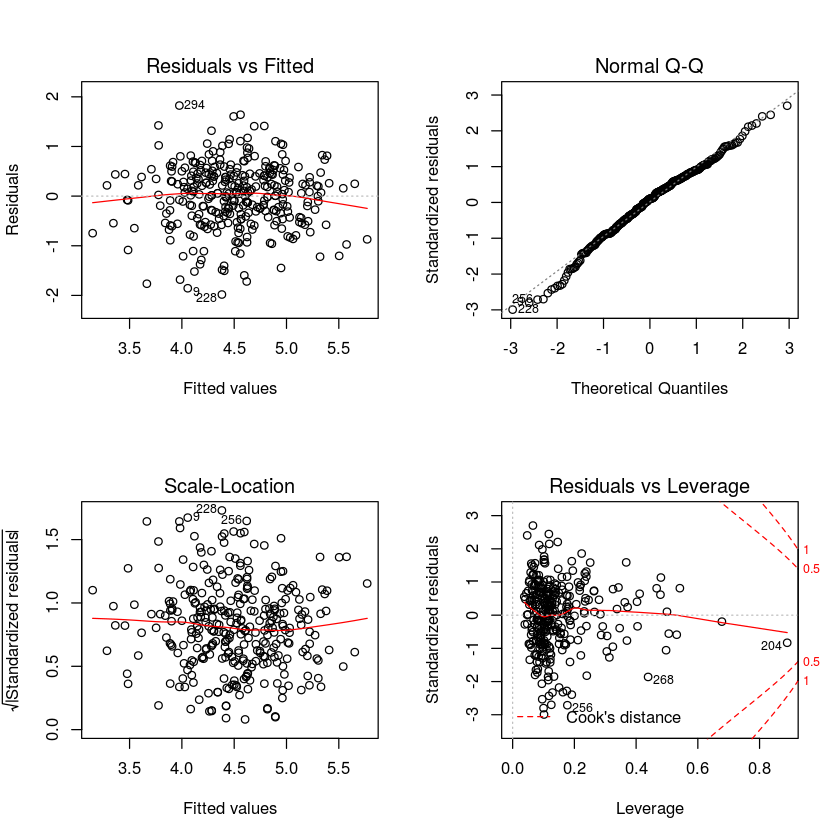

In [17]:
par(mfrow = c(2,2))
plot(baseline)

## Model 2 - remove multicollinear features

In [18]:
VIF <- vif(baseline)
VIF[VIF > 10] 

# Removing multicolinearity:
model2 <-  update(baseline, ~.
                  -mean.num.apeak
                  -avg.voiced.seg)
summary(model2) # adjusted r squared:  0.163

mean.conf.pitch mean.spec.entropy    mean.num.apeak    avg.voiced.seg 
         11.59118          10.30668          11.74448          11.60390


Call:
lm(formula = Cons ~ gender + mean.pitch + sd.pitch + mean.conf.pitch + 
    sd.conf.pitch + mean.spec.entropy + sd.spec.entropy + mean.val.apeak + 
    sd.val.apeak + mean.loc.apeak + sd.loc.apeak + sd.num.apeak + 
    mean.energy + sd.energy + mean.d.energy + sd.d.energy + avg.len.seg + 
    time.speaking + voice.rate + num.turns + hogv.entropy + hogv.median + 
    hogv.cogR + hogv.cogC + words_Extraversion + words_Agreeableness + 
    words_Conscientiousness + words_Neuroticism + words_Openness + 
    words_nExtraversion + words_nAgreeableness + words_nConscientiousness + 
    words_nNeuroticism + words_nOpenness + anger + anticipation + 
    disgust + fear + joy + negative + positive + sadness + surprise + 
    trust + sentiment, data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.05800 -0.40489  0.07599  0.41874  1.77314 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               5.585e+00  1.04

## Model 3 - Backward selection

In [20]:
remove <- ols_step_backward(model2)
paste(remove$removed, collapse = " - ")
model3 <- update(model2, ~.
                 - sd.num.apeak - hogv.cogR - words_Conscientiousness - num.turns - sd.loc.apeak 
                 - words_nConscientiousness - voice.rate - sd.conf.pitch - mean.conf.pitch 
                 - mean.energy - gender - negative - words_Agreeableness - sd.spec.entropy 
                 - mean.val.apeak - hogv.median - words_nAgreeableness - trust - words_nExtraversion - sadness)
summary(model3) # Adjusted R-squared:  0.2072 

We are eliminating variables based on p value...
No more variables satisfy the condition of prem: 0.3


[1] "sd.num.apeak - hogv.cogR - words_Conscientiousness - num.turns - sd.loc.apeak - words_nConscientiousness - voice.rate - sd.conf.pitch - mean.conf.pitch - mean.energy - gender - negative - words_Agreeableness - sd.spec.entropy - mean.val.apeak - hogv.median - words_nAgreeableness - trust - words_nExtraversion - sadness"


Call:
lm(formula = Cons ~ mean.pitch + sd.pitch + mean.spec.entropy + 
    sd.val.apeak + mean.loc.apeak + sd.energy + mean.d.energy + 
    sd.d.energy + avg.len.seg + time.speaking + hogv.entropy + 
    hogv.cogC + words_Extraversion + words_Neuroticism + words_Openness + 
    words_nNeuroticism + words_nOpenness + anger + anticipation + 
    disgust + fear + joy + positive + surprise + sentiment, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9998 -0.4042  0.0520  0.4474  1.7619 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.948e+00  7.251e-01   8.203 7.09e-15 ***
mean.pitch         -1.929e-03  9.051e-04  -2.131  0.03391 *  
sd.pitch           -5.522e-01  3.589e-01  -1.539  0.12492    
mean.spec.entropy  -3.053e-01  1.568e-01  -1.947  0.05248 .  
sd.val.apeak        2.379e+00  9.776e-01   2.433  0.01555 *  
mean.loc.apeak      1.000e+01  6.665e+00   1.500  0.13458    
sd.energy          -9.896e-02  7

## Model 4 - Remove outliers

In [21]:
outlierTest(model3) 
training_data <- training_data[-228,]
model4 <- update(model2, ~.
                 - sd.num.apeak - hogv.cogR - words_Conscientiousness - num.turns - sd.loc.apeak 
                 - words_nConscientiousness - voice.rate - sd.conf.pitch - mean.conf.pitch 
                 - mean.energy - gender - negative - words_Agreeableness - sd.spec.entropy 
                 - mean.val.apeak - hogv.median - words_nAgreeableness - trust - words_nExtraversion - sadness)
summary(model4) # Adjusted R-squared:  0.212 

No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
     rstudent unadjusted p-value Bonferonni p
228 -3.014903          0.0027925      0.90199


Call:
lm(formula = Cons ~ mean.pitch + sd.pitch + mean.spec.entropy + 
    sd.val.apeak + mean.loc.apeak + sd.energy + mean.d.energy + 
    sd.d.energy + avg.len.seg + time.speaking + hogv.entropy + 
    hogv.cogC + words_Extraversion + words_Neuroticism + words_Openness + 
    words_nNeuroticism + words_nOpenness + anger + anticipation + 
    disgust + fear + joy + positive + surprise + sentiment, data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93956 -0.40454  0.06575  0.45047  1.72115 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.918e+00  7.155e-01   8.272 4.49e-15 ***
mean.pitch         -1.874e-03  8.933e-04  -2.098 0.036773 *  
sd.pitch           -5.678e-01  3.541e-01  -1.604 0.109884    
mean.spec.entropy  -3.059e-01  1.547e-01  -1.977 0.048936 *  
sd.val.apeak        2.248e+00  9.655e-01   2.328 0.020569 *  
mean.loc.apeak      1.063e+01  6.580e+00   1.616 0.107192    
sd.energy          -9.

## Model 5 - Non linear relationships

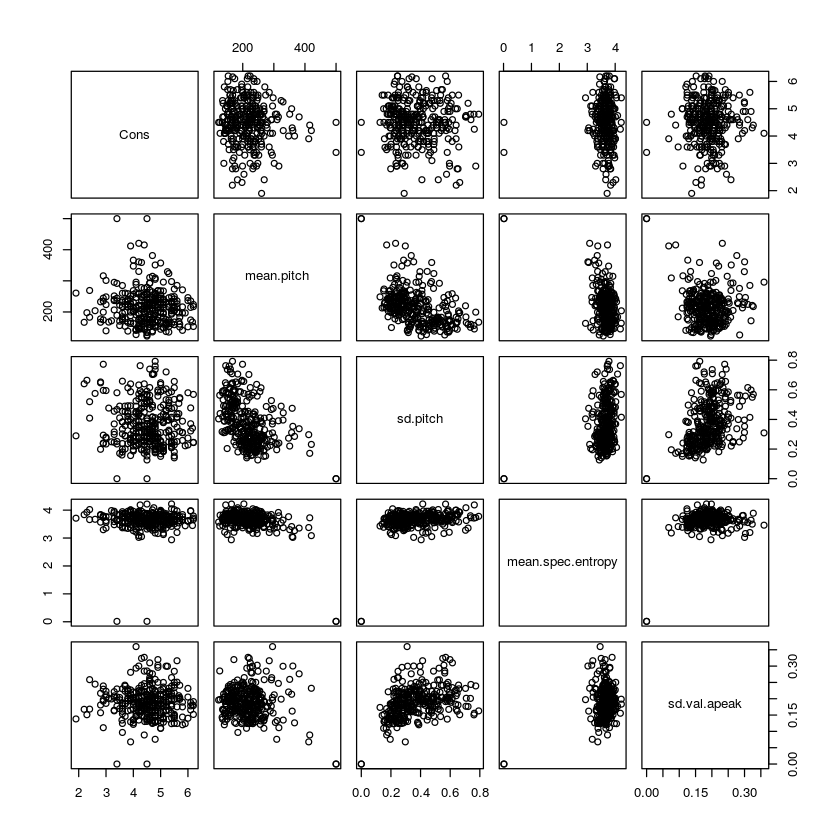

In [22]:
# Nonlinear relationships:
training_data <- 
    training_data %>%
    select(Cons, mean.pitch, sd.pitch, mean.spec.entropy,
           sd.val.apeak, mean.loc.apeak, sd.energy,  mean.d.energy,
           sd.d.energy, avg.len.seg, time.speaking, hogv.entropy,
           hogv.cogC, words_Extraversion, words_Neuroticism, words_Openness,
           words_nNeuroticism, words_nOpenness, anger, anticipation,
           disgust, fear, joy, positive, surprise, sentiment)
pairs(training_data[,c(1:5)])

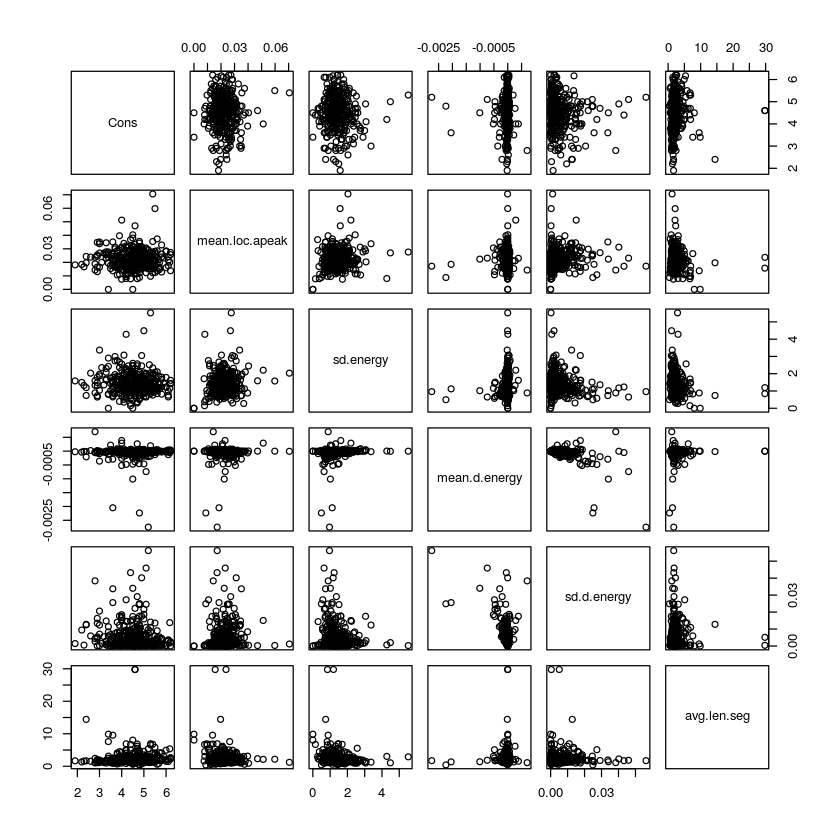

In [23]:
pairs(training_data[,c(1,6:10)])

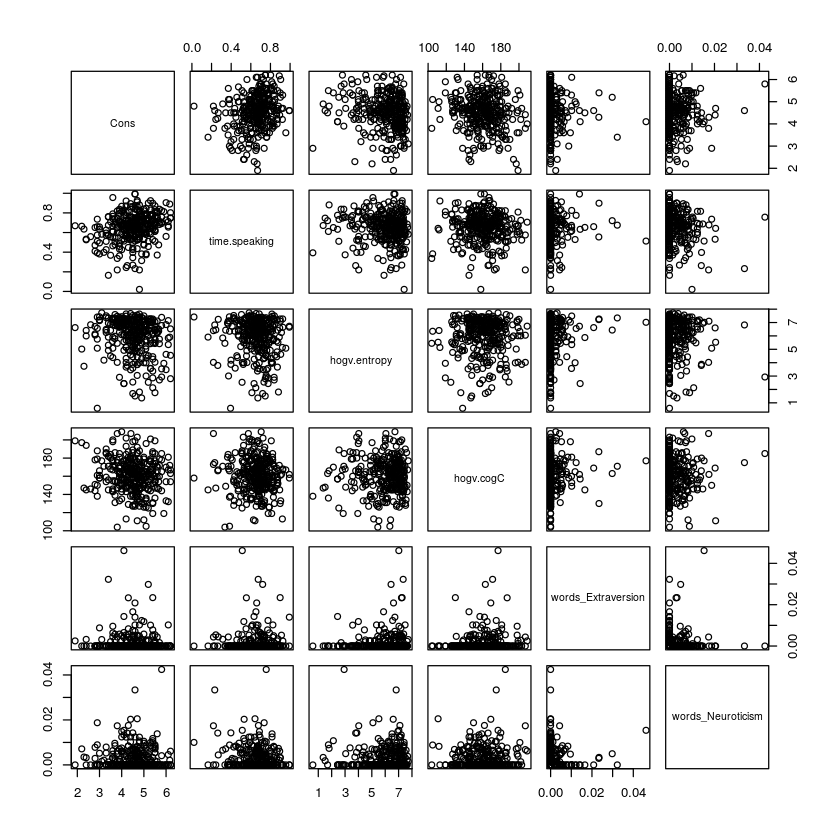

In [24]:
pairs(training_data[,c(1,11:15)])

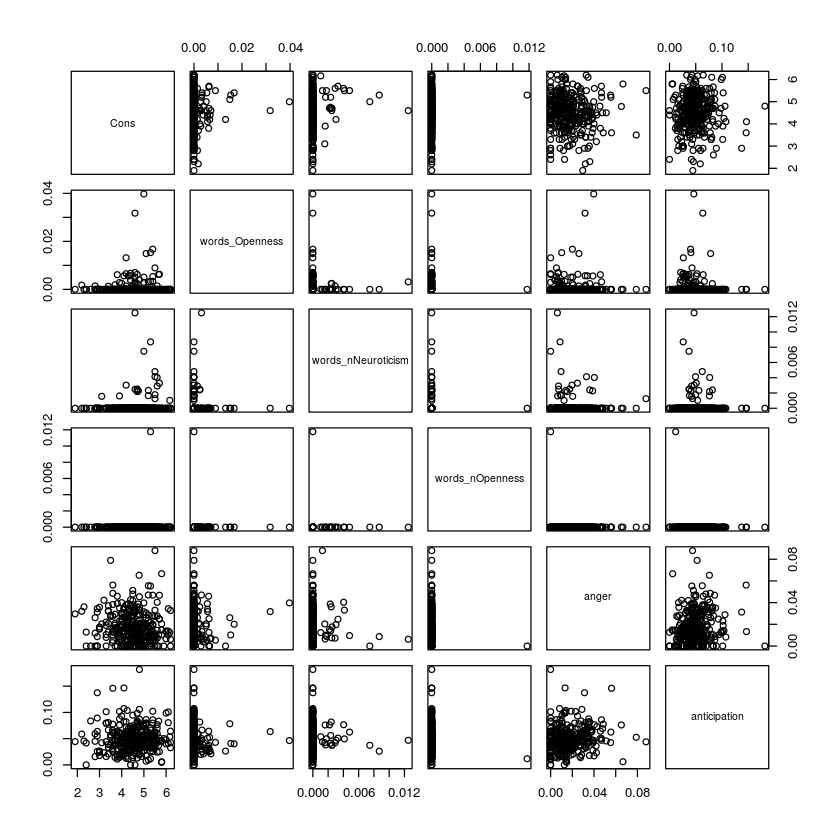

In [25]:
pairs(training_data[,c(1,16:20)])

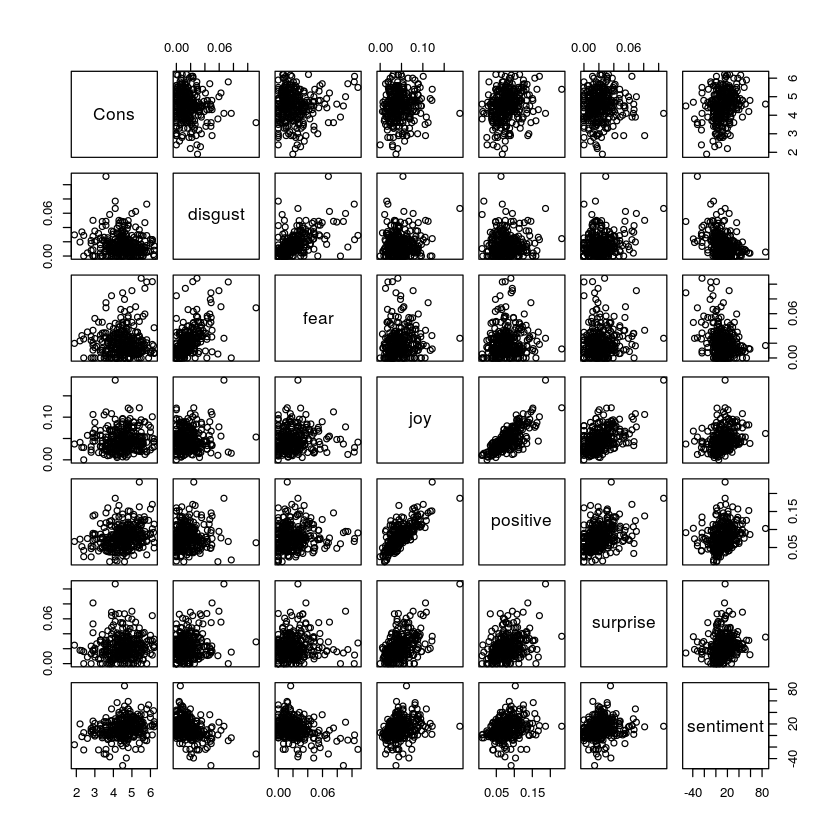

In [27]:
pairs(training_data[,c(1,21:26)])

In [28]:
model5 = update(model4, ~. + I(sd.d.energy**2))
summary(model5) # adj r^2 = .22


Call:
lm(formula = Cons ~ mean.pitch + sd.pitch + mean.spec.entropy + 
    sd.val.apeak + mean.loc.apeak + sd.energy + mean.d.energy + 
    sd.d.energy + avg.len.seg + time.speaking + hogv.entropy + 
    hogv.cogC + words_Extraversion + words_Neuroticism + words_Openness + 
    words_nNeuroticism + words_nOpenness + anger + anticipation + 
    disgust + fear + joy + positive + surprise + sentiment + 
    I(sd.d.energy^2), data = training_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.84239 -0.40539  0.05885  0.42915  1.73034 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.959e+00  7.111e-01   8.379 2.17e-15 ***
mean.pitch         -2.022e-03  8.901e-04  -2.272  0.02379 *  
sd.pitch           -6.500e-01  3.538e-01  -1.837  0.06718 .  
mean.spec.entropy  -2.974e-01  1.538e-01  -1.934  0.05408 .  
sd.val.apeak        2.445e+00  9.635e-01   2.538  0.01167 *  
mean.loc.apeak      1.137e+01  6.546e+00   1.736  0.08354 . 